In [198]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [199]:
# Download stock data for Visa Inc. (V)
ticker = 'V'
start_date = '2005-01-01'
end_date = '2020-01-01'
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")


[*********************100%***********************]  1 of 1 completed


In [162]:
# Save the data to a CSV file

# filename = f'{ticker}_{start_date}_{end_date}.csv'
# df.to_csv(filename)

In [200]:
data = data[['Close']]
data = data.dropna()
data = data['Close'].resample('MS', label='left').mean()

Plotting the data

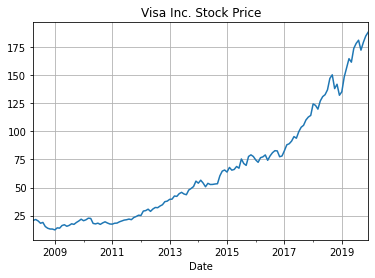

In [201]:
data.plot(title='Visa Inc. Stock Price')
plt.grid()

Splitting the data into training and test sets

In [202]:
train_size = int(len(data) * 0.80)
train_data = data[:train_size+1]
test_data = data[train_size:]
test_size = len(test_data)

In [203]:
print(train_size)
print(test_size)

112
29


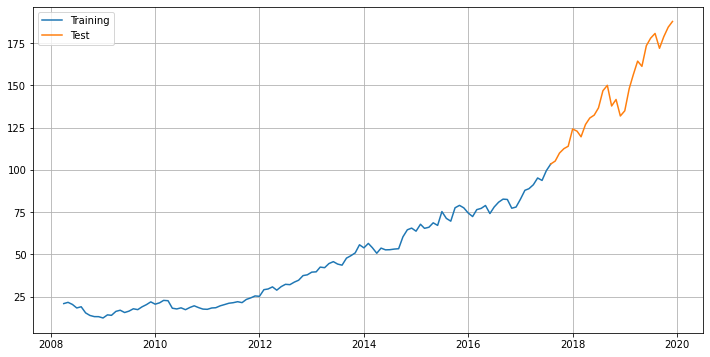

In [204]:
# Plot the training and test sets
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Test')
plt.legend()
plt.grid()


ADF Statistic: 2.302002
p-value: 0.998956
All adfuller values: (2.302001806514788, 0.9989564508675904, 2, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}, 461.97027846430404)


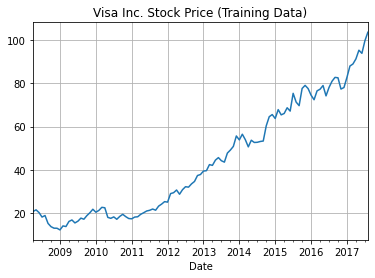

In [205]:
# Augmented Dickey-Fuller test
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('All adfuller values:', result)
train_data.plot(title='Visa Inc. Stock Price (Training Data)')
plt.grid()

Plotting PACF (Partial Autocorrelation Function) and ACF (Autocorrelation Function)

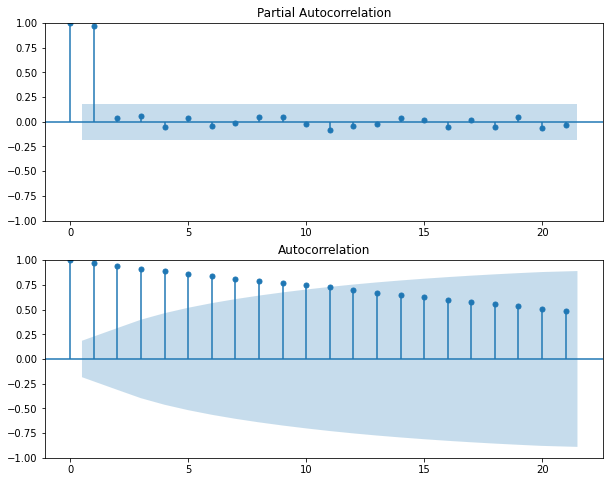

In [206]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_pacf(train_data, ax=ax1, method='ywm')
plot_acf(train_data, ax=ax2)
plt.show()

Differencing the data for stationarity

ADF Statistic: -8.054277
p-value: 0.000000
All adfuller values: (-8.054277107092624, 1.7090938447827709e-12, 1, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}, 459.21736516980513)


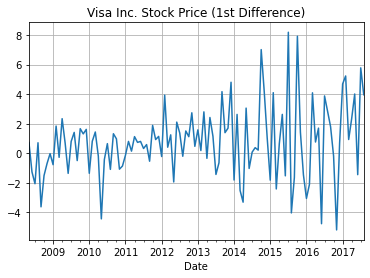

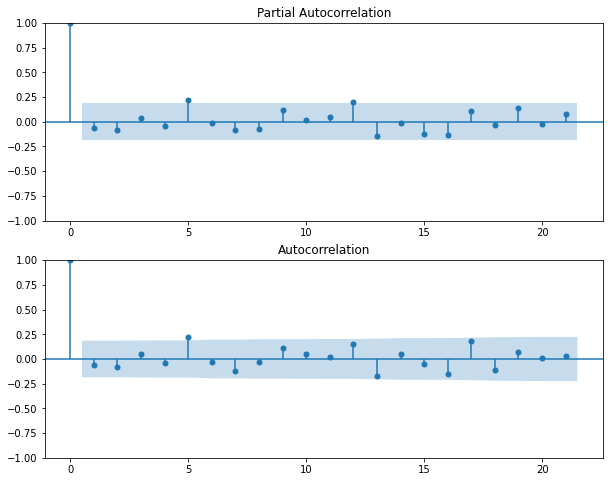

In [207]:
# Difference the data
train_data_diff = train_data.diff().dropna()
train_data_diff.plot(title='Visa Inc. Stock Price (1st Difference)')
plt.grid()

# Augmented Dickey-Fuller test on differenced data
result_diff = adfuller(train_data_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('All adfuller values:', result_diff)


# Plot the ACF and PACF of the differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_pacf(train_data_diff, ax=ax1, method='ywm')
plot_acf(train_data_diff, ax=ax2)
plt.show()

ADF Statistic: -6.638169
p-value: 0.000000
All values: (-6.638168909990953, 5.495061391135408e-09, 10, 100, {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}, 458.833885600966)


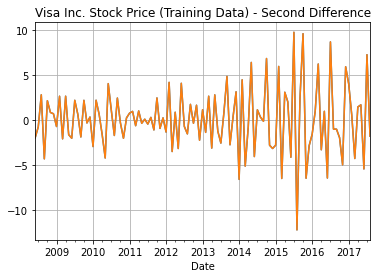

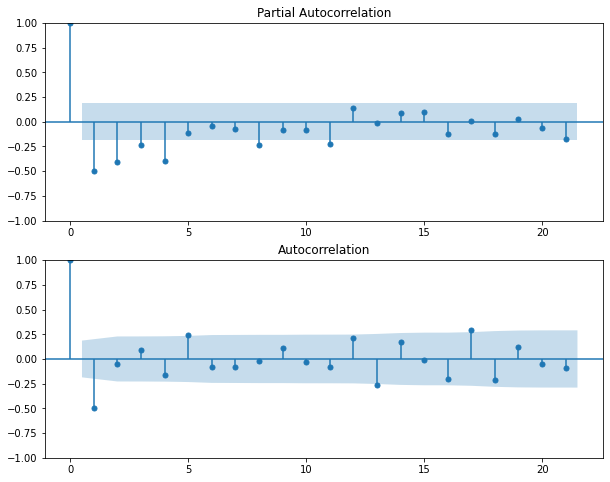

In [208]:
# Difference the data again
train_data_diff2 = train_data_diff.diff().dropna()
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')

# Augmented Dickey-Fuller test on second differenced data
result_diff2 = adfuller(train_data_diff2)
print('ADF Statistic: %f' % result_diff2[0])
print('p-value: %f' % result_diff2[1])
print('All values:', result_diff2)
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')
plt.grid()

# PACF and ACF plots on second differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_pacf(train_data_diff2, ax=ax1, method='ywm')
plot_acf(train_data_diff2, ax=ax2)
plt.show()

In [239]:
model_fit = ARIMA(train_data, order=(12, 2, 5)).fit() # (p, d, q)
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  113
Model:                ARIMA(12, 2, 5)   Log Likelihood                -240.531
Date:                Thu, 20 Apr 2023   AIC                            517.062
Time:                        12:25:40   BIC                            565.834
Sample:                    04-01-2008   HQIC                           536.847
                         - 08-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2082      0.195     -1.066      0.287      -0.591       0.175
ar.L2          0.1010      0.187      0.540      0.589      -0.266       0.468
ar.L3          0.0698      0.229      0.305      0.760      -0.378       0.518
ar.L4         -0.6656      0.227     -2.938      0.003      -1.110      -0.222
ar.L5          0.1392      0.207      0.674      0.501      -0.266       0.544
ar.L6         -0.0699      0.188     -0.372      0.710      -0.438       0.298
ar.L7         -0.1649      0.187     -0.879      0.379      -0.532       0.203
ar.L8         -0.1090      0.193     -0.564      0.573      -0.488       0.270
ar.L9          0.3045      0.170      1.792      0.073      -0.029       0.638
ar.L10         0.1062      0.171      0.620      0.535      -0.230       0.442
ar.L11         0.0486      0.173      0.280      0.779      -0.291       0.388
ar.L12         0.1880      0.137      1.377      0.169      -0.080       0.456
ma.L1         -0.7880      0.245     -3.215      0.001      -1.268      -0.308
ma.L2         -0.4286      0.210     -2.043      0.041      -0.840      -0.017
ma.L3          0.1406      0.275      0.511      0.610      -0.399       0.680
ma.L4          0.9008      0.313      2.882      0.004       0.288       1.514
ma.L5         -0.7535      0.195     -3.873      0.000      -1.135      -0.372
sigma2         4.0993      0.863      4.748      0.000       2.407       5.791
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.92   Prob(JB):                         0.77
Heteroskedasticity (H):               2.77   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Looking at the forecast of the training data, we can see that the model learns quite well

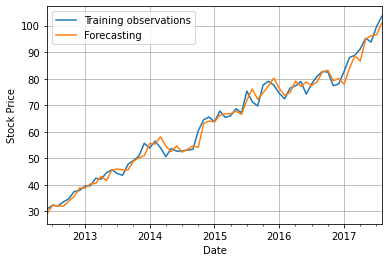

In [240]:
train_data.iloc[50:].plot(label='Training observations')
model_fit.predict(start=50, end=train_size).plot(label='Forecasting')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

Plotting training observations, forecasting test observations

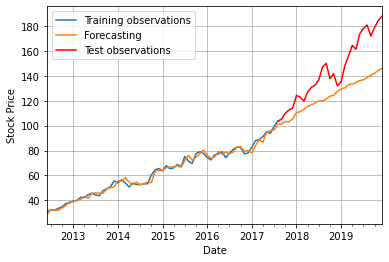

In [241]:
# Plot Training observations up until first forecasted, then plot the forecasted values, also plot the test data
train_data.iloc[50:].plot(label='Training observations')
model_fit.predict(start=50, end=train_size+test_size-1).plot(label='Forecasting')
test_data.plot(label='Test observations', color='red')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

Zoomed in view of the forecast, to see how the model performs on the test data

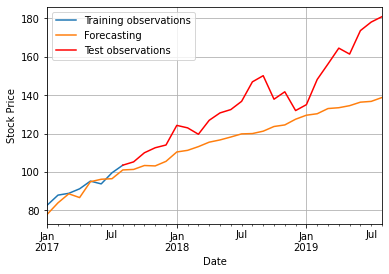

In [242]:
train_data.iloc[105:].plot(label='Training observations')
model_fit.predict(start=105, end=train_size+test_size-5).plot(label='Forecasting')
test_data.iloc[:-4].plot(label='Test observations', color='red')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()